### Learning Objectives
- Analyze the sales dataset using PySpark and Matplotlib.
- Save data into RDBMS. 

#### Example 1: Load / Read data from CSV file

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
# create the SparkSession
spark = SparkSession.builder.appName('DemoApp').getOrCreate()

df = spark.read.load("Data/Sales_October_2019.csv", format="csv", header=True, inferSchema=True)

#### Inspect Dataset

In [3]:
df.printSchema()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [4]:
df.columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [5]:
len(df.columns)

6

In [6]:
df.dtypes

[('Order ID', 'int'),
 ('Product', 'string'),
 ('Quantity Ordered', 'int'),
 ('Price Each', 'double'),
 ('Order Date', 'string'),
 ('Purchase Address', 'string')]

In [8]:
df.head(5)

[Row(Order ID=259358, Product='34in Ultrawide Monitor', Quantity Ordered=1, Price Each=379.99, Order Date='10/28/19 10:56', Purchase Address='609 Cherry St, Dallas, TX 75001'),
 Row(Order ID=259359, Product='27in 4K Gaming Monitor', Quantity Ordered=1, Price Each=389.99, Order Date='10/28/19 17:26', Purchase Address='225 5th St, Los Angeles, CA 90001'),
 Row(Order ID=259360, Product='AAA Batteries (4-pack)', Quantity Ordered=2, Price Each=2.99, Order Date='10/24/19 17:20', Purchase Address='967 12th St, New York City, NY 10001'),
 Row(Order ID=259361, Product='27in FHD Monitor', Quantity Ordered=1, Price Each=149.99, Order Date='10/14/19 22:26', Purchase Address='628 Jefferson St, New York City, NY 10001'),
 Row(Order ID=259362, Product='Wired Headphones', Quantity Ordered=1, Price Each=11.99, Order Date='10/07/19 16:10', Purchase Address='534 14th St, Los Angeles, CA 90001')]

In [9]:
df.show(truncate=False)

+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|Order ID|Product                   |Quantity Ordered|Price Each|Order Date    |Purchase Address                         |
+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|259358  |34in Ultrawide Monitor    |1               |379.99    |10/28/19 10:56|609 Cherry St, Dallas, TX 75001          |
|259359  |27in 4K Gaming Monitor    |1               |389.99    |10/28/19 17:26|225 5th St, Los Angeles, CA 90001        |
|259360  |AAA Batteries (4-pack)    |2               |2.99      |10/24/19 17:20|967 12th St, New York City, NY 10001     |
|259361  |27in FHD Monitor          |1               |149.99    |10/14/19 22:26|628 Jefferson St, New York City, NY 10001|
|259362  |Wired Headphones          |1               |11.99     |10/07/19 16:10|534 14th St, Los Angeles, CA 90001       |
|259363  |AAA Ba

#### Example 1.1: Get the sum of price and quantity columns

In [10]:
df.select("Product", "Price Each", "Quantity Ordered", "Order Date").groupby("Product").sum().show()

+--------------------+------------------+---------------------+
|             Product|   sum(Price Each)|sum(Quantity Ordered)|
+--------------------+------------------+---------------------+
|    Wired Headphones| 25119.05000000091|                 2274|
|  Macbook Pro Laptop|          892500.0|                  525|
|Apple Airpods Hea...|          249750.0|                 1674|
|              iPhone|          500500.0|                  716|
|                NULL|              NULL|                 NULL|
|Lightning Chargin...| 36179.00000000046|                 2570|
|Bose SoundSport H...|143985.60000000178|                 1465|
|USB-C Charging Cable| 29193.85000000119|                 2669|
|AAA Batteries (4-...| 6694.609999999667|                 3362|
|        20in Monitor|46965.729999999945|                  428|
|    27in FHD Monitor|118642.09000000157|                  792|
|     Vareebadd Phone|           81200.0|                  203|
|34in Ultrawide Mo...|254973.28999999774

#### Example 1.2: Get the sum of the cost column grouped by item

In [11]:
df.groupBy("Product").sum("Price Each").show()

+--------------------+------------------+
|             Product|   sum(Price Each)|
+--------------------+------------------+
|    Wired Headphones| 25119.05000000091|
|  Macbook Pro Laptop|          892500.0|
|Apple Airpods Hea...|          249750.0|
|              iPhone|          500500.0|
|                NULL|              NULL|
|Lightning Chargin...| 36179.00000000046|
|Bose SoundSport H...|143985.60000000178|
|USB-C Charging Cable| 29193.85000000119|
|AAA Batteries (4-...| 6694.609999999667|
|        20in Monitor|46965.729999999945|
|    27in FHD Monitor|118642.09000000157|
|     Vareebadd Phone|           81200.0|
|34in Ultrawide Mo...|254973.28999999774|
|            LG Dryer|           30000.0|
|AA Batteries (4-p...| 8601.600000000228|
|        Google Phone|          358200.0|
|       Flatscreen TV|          157200.0|
|  LG Washing Machine|           36600.0|
|             Product|              NULL|
|27in 4K Gaming Mo...| 280402.8099999972|
+--------------------+------------

#### Example 2: Matplotlib and Pyspark
- The PySpark DataFrame can be converted to a Python pandas DataFrame using a function toPandas().

#### Example 2.1: Using toPandas()

array([[<Axes: title={'center': 'Order ID'}>,
        <Axes: title={'center': 'Quantity Ordered'}>],
       [<Axes: title={'center': 'Price Each'}>, <Axes: >]], dtype=object)

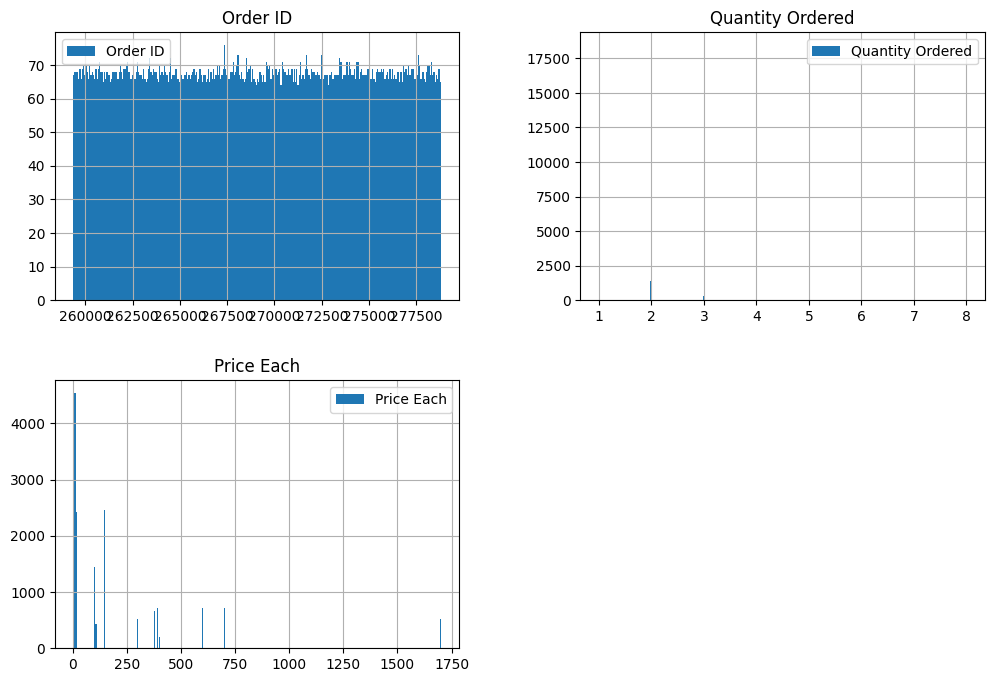

In [12]:
df_sample_pandas = df.toPandas()
df_sample_pandas.hist(bins=300, figsize=(12, 8), legend=True)

#### Example 2.2: Using toPandas()

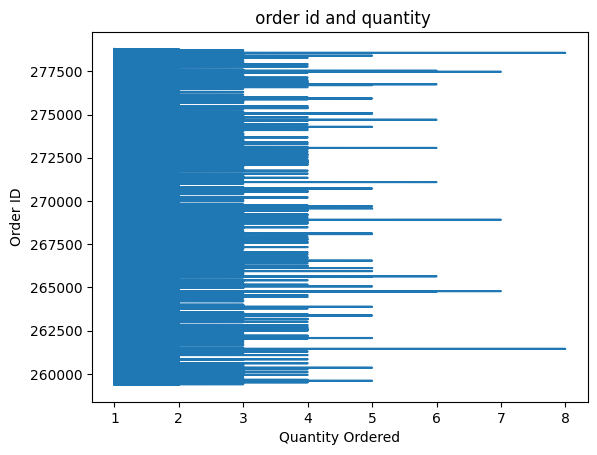

In [13]:
import matplotlib.pyplot as plt

roc = df.toPandas()
plt.plot(roc['Quantity Ordered'], roc['Order ID'])

plt.ylabel('Order ID')
plt.xlabel('Quantity Ordered')
plt.title(' order id and quantity')
plt.show()


#### Example 2.3: Write and save data into SQL
Classicmodels is the database name and salesdata is the table name, but you can change the database and table name.
- append: Append contents of this DataFrame to existing data.
- overwrite: Overwrite existing data.
- error or errorifexists: Throw an exception if data already exists.
- ignore: Silently ignore this operation if data already exists.
##### The below lines will write/store all DataFrame (column) data into the database.

In [ ]:
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
  .save()


In [19]:
# Write/store a specific DataFrame (column) in the database

df.select("Order ID","Product").write.format("jdbc") \
  .mode("overwrite") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
.option("header","false")\
  .save()
